In [1]:
import os
os.chdir('../..')
!ls

product_impacts


In [2]:
import os.path
import pandas as pd
from skimpy import skim
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

sns.set()
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
os.environ["RAY_ENABLE_MAC_LARGE_OBJECT_STORE"] = "1"

In [3]:
# enter path here
data_dir = '../../SFS/openfoodfacts/all/'

In [4]:
preds_nn = []
preds_rf = []
for prefix in ['eng/', 'non_eng/']:
    pred_nn = pd.read_csv(f'../../SFS/openfoodfacts/all/predictions/{prefix}predictions_nn.csv')
    preds_nn.append(pred_nn)
    
    pred_rf = pd.read_csv(f'../../SFS/openfoodfacts/all/predictions/{prefix}predictions_rf.csv')
    preds_rf.append(pred_rf)

pred_nn = pd.concat(preds_nn, axis=0, ignore_index=True)
pred_rf = pd.concat(preds_rf, axis=0, ignore_index=True)

/Users/shruti/anaconda3/envs/ct_map/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
pred_nn.shape

(1311860, 8)

<AxesSubplot:>

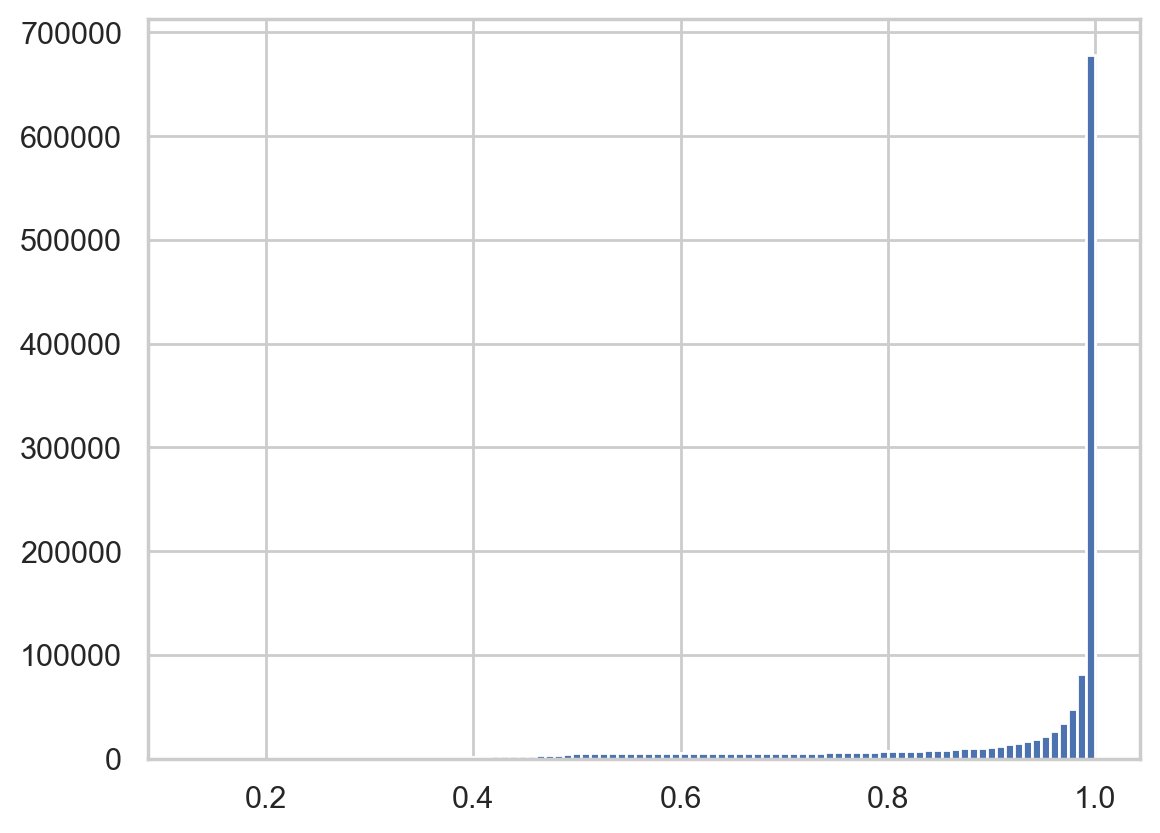

In [6]:
sns.set_style("whitegrid")
pred_nn['parentcategory_prob'].hist(bins=100)

In [7]:
pred_nn['parentcategory_prob'].describe()

count    1.311860e+06
mean     9.078631e-01
std      1.571783e-01
min      1.302626e-01
25%      8.905083e-01
50%      9.928284e-01
75%      9.995328e-01
max      9.999999e-01
Name: parentcategory_prob, dtype: float64

<AxesSubplot:>

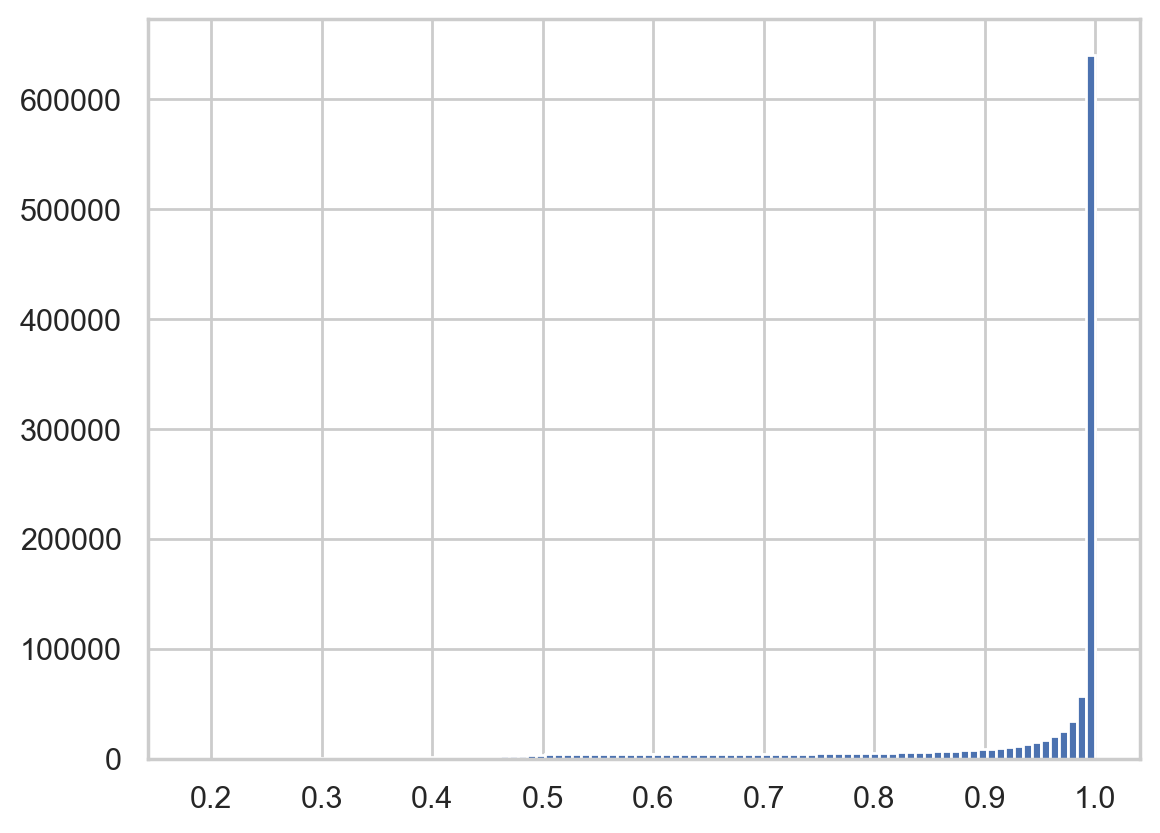

In [8]:
pred_nn['subfoodgroup_prob'].hist(bins=100)

In [9]:
pred_nn['subfoodgroup_prob'].describe()

count    1.135574e+06
mean     9.173573e-01
std      1.485855e-01
min      1.838625e-01
25%      9.118832e-01
50%      9.967357e-01
75%      9.999078e-01
max      1.000000e+00
Name: subfoodgroup_prob, dtype: float64

In [10]:
pred_nn[(pred_nn['parentcategory_prob']>0.8) 
        & ((pred_nn['subfoodgroup_prob'].isna()) | (pred_nn['subfoodgroup_prob']>0.8))].shape

(928950, 8)

In [11]:
928950/1311860

0.7081167197719269

In [12]:
pred_nn[(pred_nn['ingredients_text'].notnull())].shape

(961989, 8)

In [13]:
pred_nn[(pred_nn['ingredients_text'].notnull())
        & (pred_nn['parentcategory_prob']>0.8) 
        & ((pred_nn['subfoodgroup_prob'].isna()) | (pred_nn['subfoodgroup_prob']>0.8))].shape

(692311, 8)

In [14]:
692311/961989

0.7196662331897766

<AxesSubplot:>

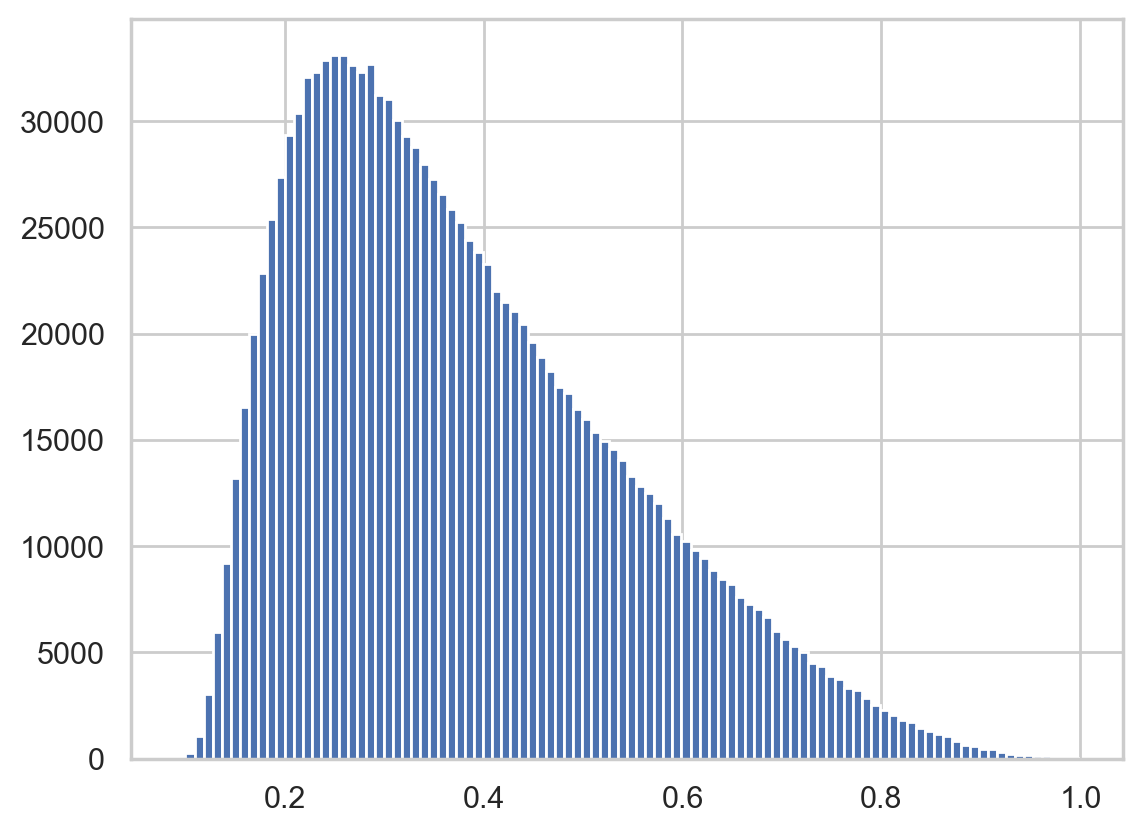

In [15]:
pred_rf['parentcategory_prob'].hist(bins=100)

<AxesSubplot:>

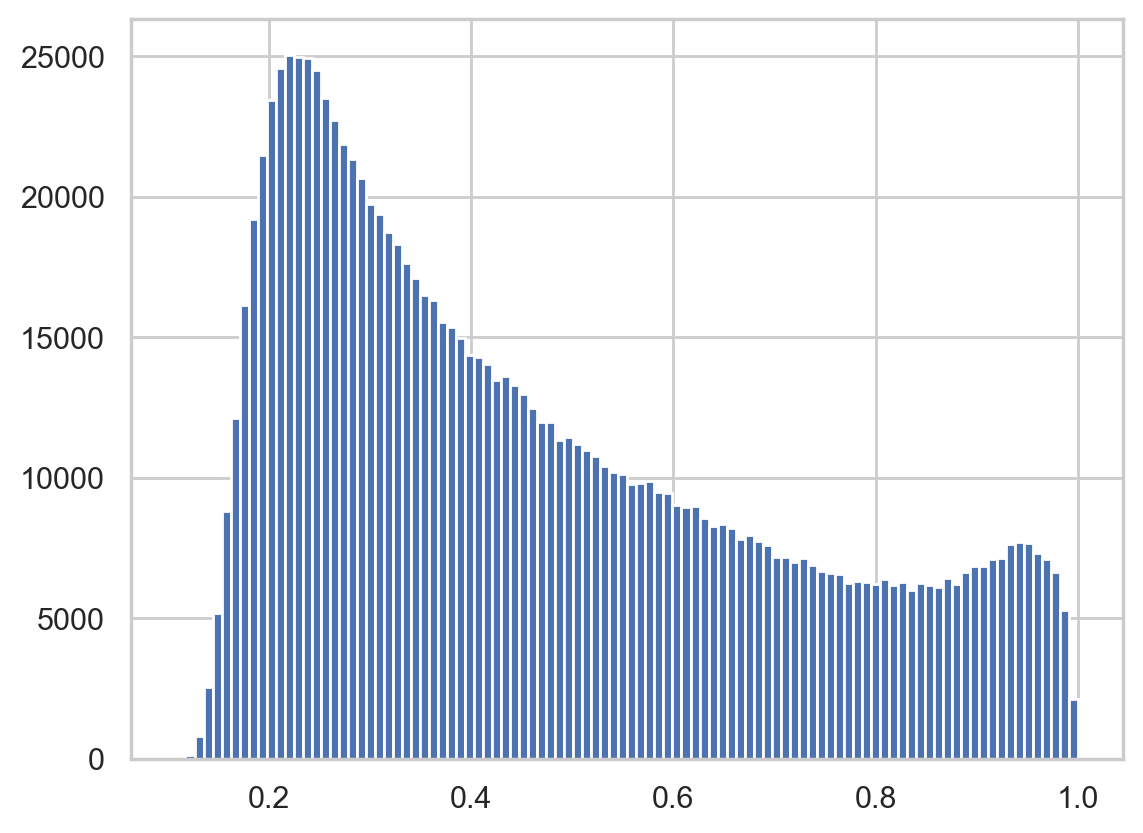

In [16]:
pred_rf['subfoodgroup_prob'].hist(bins=100)

In [17]:
pred_rf.shape

(1311860, 8)

In [19]:
pred = pred_nn
pred.shape

(1311860, 8)

In [20]:
pred['parentcategory'].value_counts()

Cereals and Cereal Products             254070
Sugar, Preserves and Confectionery      153982
Vegetables, Potatoes                    141236
Milk and Milk Products                  138615
Non-Alcoholic Beverages                 116135
Meat and Meat Products                  115479
Miscellaneous                           106679
Alcoholic Beverages                      67776
Fruit                                    47208
Nuts and Seeds                           39213
Fish and Fish Dishes                     37821
Savoury Snacks                           31373
Not Food                                 30960
Fat Spreads                              19055
Eggs and Egg Dishes                       5294
Dietary Supplements                       3964
Commercial Toddlers Foods and Drinks      1642
Artificial Sweeteners                     1358
Name: parentcategory, dtype: int64

In [23]:
# for table in paper
print(pred[pred['ingredients_text'].notnull()].shape)
pred[pred['ingredients_text'].notnull()]['subfoodgroup'].value_counts()

(961989, 8)


Savoury sauces pickles gravies & condiments                      75679
Biscuits                                                         63625
Chocolate confectionery                                          60817
Other cheese                                                     36675
Sugar confectionery                                              33691
Pasta                                                            31603
Buns cakes and pastries                                          29991
Nuts and Seeds                                                   25226
White bread (not high fibre, not multiseed bread)                23350
Savoury Snacks                                                   22492
Yogurt                                                           22402
Alcoholic Beverages                                              22295
Other vegetable products and dishes                              22233
Other chicken and turkey                                         20896
Sausag

In [20]:
pred.sample(100).sort_values(by=['parentcategory', 'subfoodgroup'])[['product_name', 'ingredients_text',
                                                                     'parentcategory', 'mainfoodgroup', 'subfoodgroup',
                                                                     'parentcategory_prob', 'subfoodgroup_prob']].reset_index(drop=True)

,product_name,ingredients_text,parentcategory,mainfoodgroup,subfoodgroup,parentcategory_prob,subfoodgroup_prob
0,"Pisco Sour 0,7L - Aperitif Merken",NaN,Alcoholic Beverages,Alcoholic Beverages,Alcoholic Beverages,0.999964,NaN
1,White Beach Mushroom,NaN,Alcoholic Beverages,Alcoholic Beverages,Alcoholic Beverages,0.906810,NaN
2,Pouce sal icre hering ceap,NaN,Alcoholic Beverages,Alcoholic Beverages,Alcoholic Beverages,0.953785,NaN
3,Passion Max,NaN,Alcoholic Beverages,Alcoholic Beverages,Alcoholic Beverages,0.999198,NaN
4,RxBar yellow,"Oats, Honey, Peanut Butter (Peanuts), Egg Whit...",Cereals and Cereal Products,Biscuits,Biscuits,0.995239,0.991947
5,Barres de céréales amandes caramélisées,"Sirop de glucose, flocons d'AVOINE 18%, céréal...",Cereals and Cereal Products,Biscuits,Biscuits,0.959746,0.865783
6,16 Mini-Blinis,Eau - farine de _blé_ - huile de colza - _from...,Cereals and Cereal Products,Biscuits,Biscuits,0.793496,0.981472
7,Crackers,"Pastry flour (bleached wheat flour, malted bar...",Cereals and Cereal Products,Biscuits,Biscuits,0.998988,0.821700
8,Turrón de Jijona,"Almendras tostadas (64%), azúcar, miel (12%), ...",Cereals and Cereal Products,Biscuits,Biscuits,0.636390,0.993511
9,Préparation boulangère pour pain maïs et tourn...,"Farine de blé*, maïs 15% (extrudé et farine), ...",Cereals and Cereal Products,Bread,"Brown, granary and wheatgerm bread",0.997277,0.861842


In [21]:
skim(pred_nn)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                 Data Types                                          │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                   │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                   │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                   │
│ │ Number of rows    │ 1311860 │ │ object      │ 5     │                                   │
│ │ Number of columns │ 8       │ │ float64     │ 2     │                                   │
│ └───────────────────┴─────────┘ │ int64       │ 1     │                                   │
│                                 └─────────────┴───────┘                                   │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┓  │
│ ┃        ┃ missin ┃ comple ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p75   ┃ p100   ┃ hist  ┃  │
│ ┃        ┃ g      ┃ te     ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┃        ┃        ┃ rate   ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━┩  │
│ │ produc │      0 │      1 │ 240000 │ 110000 │ 29000 │ 290000 │ 29000 │ 290000 │   ▂   │  │
│ │ t_id   │        │        │ 000000 │ 000000 │  0000 │ 000000 │ 00000 │ 000000 │   █   │  │
│ │        │        │        │    000 │    000 │       │    000 │ 00000 │    000 │       │  │
│ │ parent │      0 │      1 │   0.91 │   0.16 │  0.13 │   0.89 │     1 │      1 │   ▁▁▁ │  │
│ │ catego │        │        │        │        │       │        │       │        │   █   │  │
│ │ ry_pro │        │        │        │        │       │        │       │        │       │  │
│ │ b      │        │        │        │        │       │        │       │        │       │  │
│ │ subfoo │ 180000 │   0.87 │   0.92 │   0.15 │  0.18 │   0.91 │     1 │      1 │   ▁▁▁ │  │
│ │ dgroup │        │        │        │        │       │        │       │        │   █   │  │
│ │ _prob  │        │        │        │        │       │        │       │        │       │  │
│ └────────┴────────┴────────┴────────┴────────┴───────┴────────┴───────┴────────┴───────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [22]:
skim(pred_rf)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                 Data Types                                          │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                   │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                   │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                   │
│ │ Number of rows    │ 1311860 │ │ object      │ 5     │                                   │
│ │ Number of columns │ 8       │ │ float64     │ 2     │                                   │
│ └───────────────────┴─────────┘ │ int64       │ 1     │                                   │
│                                 └─────────────┴───────┘                                   │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┓  │
│ ┃        ┃ missin ┃ comple ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p75   ┃ p100   ┃ hist  ┃  │
│ ┃        ┃ g      ┃ te     ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┃        ┃        ┃ rate   ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━┩  │
│ │ produc │      0 │      1 │ 240000 │ 110000 │ 29000 │ 290000 │ 29000 │ 290000 │   ▂   │  │
│ │ t_id   │        │        │ 000000 │ 000000 │  0000 │ 000000 │ 00000 │ 000000 │   █   │  │
│ │        │        │        │    000 │    000 │       │    000 │ 00000 │    000 │       │  │
│ │ parent │      0 │      1 │   0.38 │   0.16 │ 0.091 │   0.25 │  0.48 │      1 │ ▅█▅▃▁ │  │
│ │ catego │        │        │        │        │       │        │       │        │       │  │
│ │ ry_pro │        │        │        │        │       │        │       │        │       │  │
│ │ b      │        │        │        │        │       │        │       │        │       │  │
│ │ subfoo │ 200000 │   0.85 │   0.47 │   0.23 │  0.11 │   0.27 │  0.63 │      1 │ ▇█▅▄▃ │  │
│ │ dgroup │        │        │        │        │       │        │       │        │   ▃   │  │
│ │ _prob  │        │        │        │        │       │        │       │        │       │  │
│ └────────┴────────┴────────┴────────┴────────┴───────┴────────┴───────┴────────┴───────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [23]:
pred_compare = pred_nn.rename(columns={
    'parentcategory': 'parentcategory_nn',
    'mainfoodgroup': 'mainfoodgroup_nn',
    'subfoodgroup': 'subfoodgroup_nn',
    'parentcategory_prob': 'parentcategory_prob_nn',
    'subfoodgroup_prob': 'subfoodgroup_prob_nn'
}).merge(pred_rf.rename(columns={
    'parentcategory': 'parentcategory_rf',
    'mainfoodgroup': 'mainfoodgroup_rf',
    'subfoodgroup': 'subfoodgroup_rf',
    'parentcategory_prob': 'parentcategory_prob_rf',
    'subfoodgroup_prob': 'subfoodgroup_prob_rf'
}))

In [24]:
# rf confidence remains noisy and low in all cases, but maybe its even lower when both models dont agree, maybe more tuning is needed for rf?

In [25]:
# nn is quite confident when both models agree on predicted parent category
skim(pred_compare[pred_compare['parentcategory_nn']==pred_compare['parentcategory_rf']])

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                 Data Types                                          │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                   │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                   │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                   │
│ │ Number of rows    │ 1058466 │ │ object      │ 8     │                                   │
│ │ Number of columns │ 13      │ │ float64     │ 4     │                                   │
│ └───────────────────┴─────────┘ │ int64       │ 1     │                                   │
│                                 └─────────────┴───────┘                                   │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┓  │
│ ┃        ┃ missin ┃ comple ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p75   ┃ p100   ┃ hist  ┃  │
│ ┃        ┃ g      ┃ te     ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┃        ┃        ┃ rate   ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━┩  │
│ │ produc │      0 │      1 │ 240000 │ 100000 │ 29000 │ 290000 │ 29000 │ 290000 │   ▂   │  │
│ │ t_id   │        │        │ 000000 │ 000000 │  0000 │ 000000 │ 00000 │ 000000 │   █   │  │
│ │        │        │        │    000 │    000 │       │    000 │ 00000 │    000 │       │  │
│ │ parent │      0 │      1 │   0.94 │   0.12 │  0.17 │   0.96 │     1 │      1 │     ▁ │  │
│ │ catego │        │        │        │        │       │        │       │        │   █   │  │
│ │ ry_pro │        │        │        │        │       │        │       │        │       │  │
│ │ b_     │        │        │        │        │       │        │       │        │       │  │
│ │ subfoo │ 130000 │   0.88 │   0.92 │   0.14 │  0.18 │   0.93 │     1 │      1 │    ▁▁ │  │
│ │ dgroup │        │        │        │        │       │        │       │        │   █   │  │
│ │ _prob_ │        │        │        │        │       │        │       │        │       │  │
│ │ nn     │        │        │        │        │       │        │       │        │       │  │
│ │ parent │      0 │      1 │   0.41 │   0.16 │ 0.091 │   0.29 │  0.52 │      1 │ ▃█▆▃▁ │  │
│ │ catego │        │        │        │        │       │        │       │        │       │  │
│ │ ry_pro │        │        │        │        │       │        │       │        │       │  │
│ │ b_     │        │        │        │        │       │        │       │        │       │  │
│ │ subfoo │ 130000 │   0.88 │   0.48 │   0.23 │  0.11 │   0.29 │  0.65 │      1 │ ▆█▆▄▃ │  │
│ │ dgroup │        │        │        │        │       │        │       │        │   ▃   │  │
│ │ _prob_ │        │        │        │        │       │        │       │        │       │  │
│ │ rf     │        │        │        │        │       │        │       │        │       │  │
│ └────────┴────────┴────────┴────────┴────────┴───────┴────────┴───────┴────────┴───────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [26]:
# nn is quite confident (lev 0 and lev 2) when both models agree on lev 0 and lev 2 classes
skim(pred_compare[(pred_compare['parentcategory_nn']==pred_compare['parentcategory_rf'])
             & (pred_compare['subfoodgroup_nn']==pred_compare['subfoodgroup_rf'])])

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 927001 │ │ object      │ 8     │                                    │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                    │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┓  │
│ ┃        ┃ missin ┃ comple ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p75   ┃ p100   ┃ hist  ┃  │
│ ┃        ┃ g      ┃ te     ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┃        ┃        ┃ rate   ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━┩  │
│ │ produc │      0 │      1 │ 240000 │ 100000 │ 29000 │ 290000 │ 29000 │ 290000 │   ▂   │  │
│ │ t_id   │        │        │ 000000 │ 000000 │  0000 │ 000000 │ 00000 │ 000000 │   █   │  │
│ │        │        │        │    000 │    000 │       │    000 │ 00000 │    000 │       │  │
│ │ parent │      0 │      1 │   0.94 │   0.12 │  0.17 │   0.97 │     1 │      1 │     ▁ │  │
│ │ catego │        │        │        │        │       │        │       │        │   █   │  │
│ │ ry_pro │        │        │        │        │       │        │       │        │       │  │
│ │ b_     │        │        │        │        │       │        │       │        │       │  │
│ │ subfoo │ 130000 │   0.86 │   0.95 │   0.11 │  0.21 │   0.98 │     1 │      1 │       │  │
│ │ dgroup │        │        │        │        │       │        │       │        │   █   │  │
│ │ _prob_ │        │        │        │        │       │        │       │        │       │  │
│ │ nn     │        │        │        │        │       │        │       │        │       │  │
│ │ parent │      0 │      1 │   0.42 │   0.16 │ 0.091 │   0.29 │  0.52 │      1 │ ▃█▆▃▁ │  │
│ │ catego │        │        │        │        │       │        │       │        │       │  │
│ │ ry_pro │        │        │        │        │       │        │       │        │       │  │
│ │ b_     │        │        │        │        │       │        │       │        │       │  │
│ │ subfoo │ 130000 │   0.86 │   0.52 │   0.23 │  0.11 │   0.33 │  0.69 │      1 │ ▄█▆▅▄ │  │
│ │ dgroup │        │        │        │        │       │        │       │        │   ▄   │  │
│ │ _prob_ │        │        │        │        │       │        │       │        │       │  │
│ │ rf     │        │        │        │        │       │        │       │        │       │  │
│ └────────┴────────┴────────┴────────┴────────┴───────┴────────┴───────┴────────┴───────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [27]:
# nn confidence reduces (esp for lev 2) when both models agree on lev 0 but disagree on lev 2, these are explored in next cell
skim(pred_compare[(pred_compare['parentcategory_nn']==pred_compare['parentcategory_rf'])
             & (pred_compare['subfoodgroup_nn']!=pred_compare['subfoodgroup_rf'])])

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 131465 │ │ object      │ 8     │                                    │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                    │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┓  │
│ ┃        ┃ missin ┃ comple ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p75   ┃ p100   ┃ hist  ┃  │
│ ┃        ┃ g      ┃ te     ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┃        ┃        ┃ rate   ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━┩  │
│ │ produc │      0 │      1 │ 250000 │ 970000 │ 29000 │ 290000 │ 29000 │ 290000 │   ▁   │  │
│ │ t_id   │        │        │ 000000 │ 000000 │  0000 │ 000000 │ 00000 │ 000000 │   █   │  │
│ │        │        │        │    000 │     00 │       │    000 │ 00000 │    000 │       │  │
│ │ parent │      0 │      1 │   0.93 │   0.14 │  0.18 │   0.93 │     1 │      1 │    ▁▁ │  │
│ │ catego │        │        │        │        │       │        │       │        │   █   │  │
│ │ ry_pro │        │        │        │        │       │        │       │        │       │  │
│ │ b_     │        │        │        │        │       │        │       │        │       │  │
│ │ subfoo │      0 │      1 │   0.76 │   0.19 │  0.18 │   0.59 │  0.94 │      1 │  ▁▄▄▄ │  │
│ │ dgroup │        │        │        │        │       │        │       │        │   █   │  │
│ │ _prob_ │        │        │        │        │       │        │       │        │       │  │
│ │ nn     │        │        │        │        │       │        │       │        │       │  │
│ │ parent │      0 │      1 │   0.38 │   0.15 │   0.1 │   0.26 │  0.48 │   0.99 │ ▅█▅▃▁ │  │
│ │ catego │        │        │        │        │       │        │       │        │       │  │
│ │ ry_pro │        │        │        │        │       │        │       │        │       │  │
│ │ b_     │        │        │        │        │       │        │       │        │       │  │
│ │ subfoo │      0 │      1 │   0.27 │  0.099 │  0.11 │    0.2 │  0.32 │   0.84 │ █▇▂▁  │  │
│ │ dgroup │        │        │        │        │       │        │       │        │       │  │
│ │ _prob_ │        │        │        │        │       │        │       │        │       │  │
│ │ rf     │        │        │        │        │       │        │       │        │       │  │
│ └────────┴────────┴────────┴────────┴────────┴───────┴────────┴───────┴────────┴───────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [29]:
pred_compare[(pred_compare['parentcategory_nn']==pred_compare['parentcategory_rf'])
             & (pred_compare['subfoodgroup_nn']!=pred_compare['subfoodgroup_rf'])].sample(100)[[
    'product_name', 'ingredients_text', 
    'parentcategory_nn', 'subfoodgroup_nn',
    'parentcategory_prob_nn', 'subfoodgroup_prob_nn', 
    'parentcategory_rf', 'subfoodgroup_rf',
    'parentcategory_prob_rf', 'subfoodgroup_prob_rf']].reset_index(drop=True)

,product_name,ingredients_text,parentcategory_nn,subfoodgroup_nn,parentcategory_prob_nn,subfoodgroup_prob_nn,parentcategory_rf,subfoodgroup_rf,parentcategory_prob_rf,subfoodgroup_prob_rf
0,Dinkel Zwieback,"DINKELMEHL*¹ Type 630 (83%), DINKELVOLLKORNSCH...",Cereals and Cereal Products,Biscuits,0.997509,0.642763,Cereals and Cereal Products,Other cereals,0.321713,0.211795
1,Beaufort AOP au lait cru,"Lait cru de vache, sel, présure, fermants lact...",Milk and Milk Products,Other milk,0.999983,0.413378,Milk and Milk Products,Semi-skimmed milk,0.350272,0.172242
2,Pommes de Terre Méditerranée,Pommes de terre préfrites 85% (pomme de terre ...,"Vegetables, Potatoes",Other fried/roast/baked potatoes,0.998864,0.979783,"Vegetables, Potatoes",Other potato products and dishes,0.480736,0.322520
3,2 cod fillet fishcakes,NaN,Fish and Fish Dishes,White fish coated or fried,0.999977,0.988627,Fish and Fish Dishes,Other white fish,0.505695,0.511170
4,Crème Fraîche épaisse Fermière Petit Format BB...,lait,Milk and Milk Products,Cream (including imitation cream),0.999659,0.628398,Milk and Milk Products,Other cheese,0.293557,0.284344
5,Sorbet framboise ERHARD,",raspberry puree 50%, dB fràmbvesa 50%, agua,a...",Milk and Milk Products,Ice cream,0.948977,0.801467,Milk and Milk Products,Other milk,0.202544,0.217909
6,Stroopwafels met roomboter,"TARWEbloem, stroop 32% (glucose-fructosestroop...",Cereals and Cereal Products,Buns cakes and pastries,0.975466,0.910385,Cereals and Cereal Products,Biscuits,0.434563,0.323933
7,Wheat pinwheels,"Wheat flour, corn starch, iodized salt, sodium...",Cereals and Cereal Products,Other cereals,0.990848,0.556557,Cereals and Cereal Products,"White bread (not high fibre, not multiseed bread)",0.359002,0.169111
8,Pepas con membrillo,"Harina de trigo tipo 000 (hierro 0.0030%, niac...",Cereals and Cereal Products,Other cereals,0.985770,0.474950,Cereals and Cereal Products,Biscuits,0.320580,0.184653
9,Saltelli Grissini,"farine de blé tendre, huile de tournesol (9,5%...",Cereals and Cereal Products,Biscuits,0.999744,0.701488,Cereals and Cereal Products,"White bread (not high fibre, not multiseed bread)",0.433852,0.277663


In [30]:
# nn confidence reduces (for both lev 0 and lev 2) when both models don't agree on parent category, these are explored in next cell
skim(pred_compare[pred_compare['parentcategory_nn']!=pred_compare['parentcategory_rf']])

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 253394 │ │ object      │ 8     │                                    │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                    │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┓  │
│ ┃        ┃ missin ┃ comple ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p75   ┃ p100   ┃ hist  ┃  │
│ ┃        ┃ g      ┃ te     ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┃        ┃        ┃ rate   ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━┩  │
│ │ produc │      0 │      1 │ 220000 │ 120000 │ 29000 │ 290000 │ 29000 │ 290000 │   ▃   │  │
│ │ t_id   │        │        │ 000000 │ 000000 │ 00000 │ 000000 │ 00000 │ 000000 │   █   │  │
│ │        │        │        │    000 │    000 │       │     00 │ 00000 │    000 │       │  │
│ │ parent │      0 │      1 │   0.76 │    0.2 │  0.13 │    0.6 │  0.95 │      1 │  ▁▃▃▃ │  │
│ │ catego │        │        │        │        │       │        │       │        │   █   │  │
│ │ ry_pro │        │        │        │        │       │        │       │        │       │  │
│ │ b_     │        │        │        │        │       │        │       │        │       │  │
│ │ subfoo │  47000 │   0.81 │   0.89 │   0.17 │  0.19 │   0.83 │     1 │      1 │   ▁▁▁ │  │
│ │ dgroup │        │        │        │        │       │        │       │        │   █   │  │
│ │ _prob_ │        │        │        │        │       │        │       │        │       │  │
│ │ nn     │        │        │        │        │       │        │       │        │       │  │
│ │ parent │      0 │      1 │   0.25 │  0.079 │ 0.094 │   0.19 │  0.29 │   0.79 │  ▇█▂  │  │
│ │ catego │        │        │        │        │       │        │       │        │       │  │
│ │ ry_pro │        │        │        │        │       │        │       │        │       │  │
│ │ b_     │        │        │        │        │       │        │       │        │       │  │
│ │ subfoo │  68000 │   0.73 │   0.38 │   0.23 │  0.11 │   0.22 │  0.47 │      1 │ █▆▂▁▁ │  │
│ │ dgroup │        │        │        │        │       │        │       │        │   ▁   │  │
│ │ _prob_ │        │        │        │        │       │        │       │        │       │  │
│ │ rf     │        │        │        │        │       │        │       │        │       │  │
│ └────────┴────────┴────────┴────────┴────────┴───────┴────────┴───────┴────────┴───────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [ ]:
pred_compare[(pred_compare['parentcategory_nn']!=pred_compare['parentcategory_rf'])].sample(100)[[
    'product_name', 'ingredients_text', 
    'parentcategory_nn', 'subfoodgroup_nn',
    'parentcategory_prob_nn', 'subfoodgroup_prob_nn', 
    'parentcategory_rf', 'subfoodgroup_rf',
    'parentcategory_prob_rf', 'subfoodgroup_prob_rf']].reset_index(drop=True)

,product_name,ingredients_text,parentcategory_nn,subfoodgroup_nn,parentcategory_prob_nn,subfoodgroup_prob_nn,parentcategory_rf,subfoodgroup_rf,parentcategory_prob_rf,subfoodgroup_prob_rf
0,Paella,Viande de poulet enrobée et braisée 33% [haut ...,Cereals and Cereal Products,Rice,0.713429,0.999650,Meat and Meat Products,Other chicken and turkey,0.304333,0.338266
1,Viande Assaisonnement pour grillade,"Calamars (65%), huile de tournesol, concentré ...",Fish and Fish Dishes,Oily fish,0.956720,0.998028,Meat and Meat Products,Beef and veal,0.251578,0.233944
2,Oasis Sirop Ice Peche Abricot Tea,NaN,Non-Alcoholic Beverages,Tea (made up),0.998955,0.803226,Alcoholic Beverages,Alcoholic Beverages,0.277899,NaN
3,Meistersalat Eiersalat,"_Eier_ 54%, Rapsöl, gekochtes _Hühnereieiweiß_...","Vegetables, Potatoes",Other vegetable products and dishes,0.802616,0.748528,Miscellaneous,Savoury sauces pickles gravies & condiments,0.227326,0.824368
4,Crunchy Chickpeas,"Chickpeas, sunflower oil. contains 2% or less ...","Vegetables, Potatoes",Beans and pulses (including ready meal & homem...,0.847354,0.957010,Savoury Snacks,Savoury Snacks,0.285384,NaN
5,PEARLS,"Olives, water, sea salt, and ferrous gluconate...",Fish and Fish Dishes,Shellfish,0.742872,0.550823,Cereals and Cereal Products,Pasta,0.158842,0.156640
6,Tlitli,"Semoule de _blé_ dur de qualité supérieure,",Not Food,Not Food,0.730216,NaN,Alcoholic Beverages,Alcoholic Beverages,0.167369,NaN
7,Cocktail de champignons,"Pleurotes 30% (Pleurotus ostreatus), lentins d...",Non-Alcoholic Beverages,Fruit juice,0.358448,0.561223,Alcoholic Beverages,Alcoholic Beverages,0.156180,NaN
8,Thé english breakfast bio,NaN,Cereals and Cereal Products,Biscuits,0.794477,0.850280,Meat and Meat Products,Other meat products,0.142358,0.174023
9,Apfelmus,"Äpfel, Zucker, Säuerungsmittel: Apfelsäure; An...",Fruit,Apples and pears not canned,0.998385,0.949043,Non-Alcoholic Beverages,"Soft drinks low calorie, ready to drink, still",0.273939,0.236086
